In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)


5


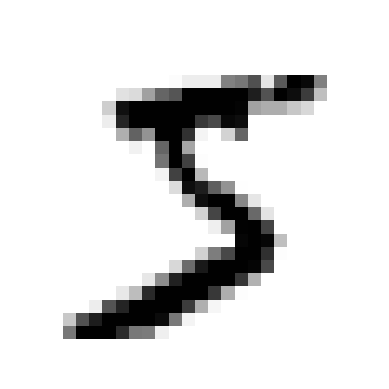

In [2]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')

some_digit = x_train[0]
plot_digit(some_digit)
print(y_train[0])
plt.show()






In [3]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42).fit(x_train, y_train_5)


SGDClassifier(random_state=42)

In [5]:
sgd_clf.predict(some_digit.reshape(1, -1))

array([ True])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=sgd_clf, 
                X = x_train, 
                y = y_train_5,
                cv = 3, 
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [7]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [8]:
cross_val_score(dummy_clf, x_train, y_train_5, cv = 3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [10]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))


0.8370879772350012
0.6511713705958311


In [11]:
from sklearn.metrics import f1_score 
print(f1_score(y_train_5, y_train_pred))

0.7325171197343847


In [12]:
y_scores  = sgd_clf.decision_function([some_digit])

In [15]:
y_scores

array([2164.22030239])

In [16]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [17]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [18]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3, method = 'decision_function')

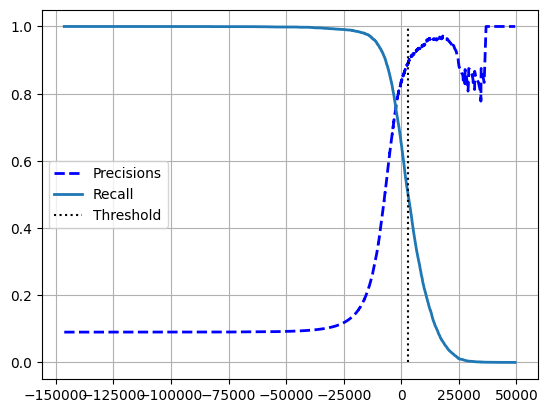

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshlods = precision_recall_curve(y_train_5, y_scores)
plt.plot(threshlods, precisions[:-1], 'b--', label = 'Precisions', linewidth = 2)
plt.plot(threshlods, recalls[:-1], label = 'Recall', linewidth = 2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label = 'Threshold')
plt.legend()
plt.grid()
plt.show()

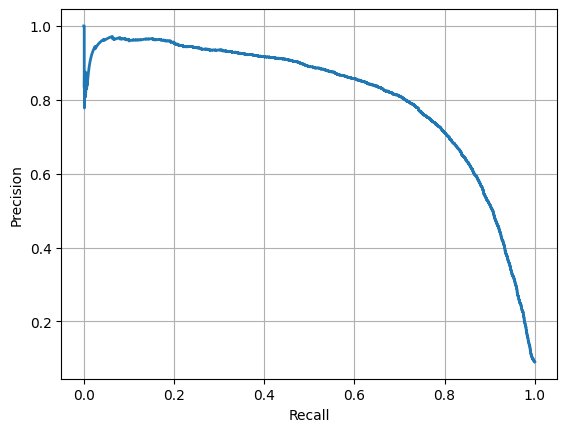

In [30]:
plt.plot(recalls, precisions, linewidth = 2, label = 'Precisions/Recall curve')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [31]:
idx_for_90_precision = (precisions >= 0.9).argmax()
threshlod_for_90_precision = threshlods[idx_for_90_precision]
threshlod_for_90_precision

np.float64(3370.0194991439557)

In [32]:
y_train_pred_90 = (y_scores > threshlod_for_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))



0.9
0.47980077476480354


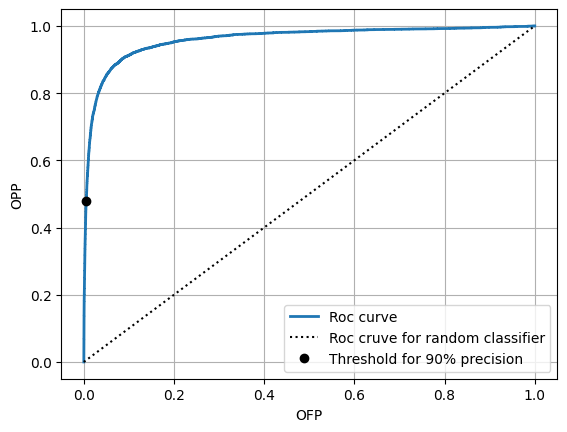

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, threshlods = roc_curve(y_train_5, y_scores)
idx_for_threshold_90 = (threshlods <= threshlod_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_90], fpr[idx_for_threshold_90]
plt.plot(fpr, tpr, linewidth = 2, label = 'Roc curve')
plt.plot([0,1], [0,1], 'k:', label = 'Roc cruve for random classifier')
plt.plot([fpr_90], [tpr_90], 'ko', label = 'Threshold for 90% precision')
plt.legend()
plt.xlabel('OFP')
plt.ylabel('OPP')
plt.grid()
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9604938554008616


In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv = 3, method = 'predict_proba')
y_probas_forest[:3]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04]])

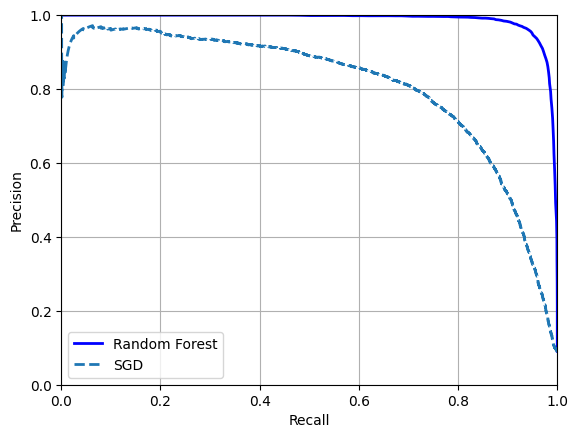

0.9274509803921569

In [43]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)


plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)